# Task 2: MNIST Digit Classification using TensorFlow (CNN)

###  Objective:
- Train a CNN on MNIST dataset
- Achieve >95% test accuracy
- Visualize predictions on 5 test images

## Import Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras import layers, models
# import tensorflow as tf
# print(tf.__version__)


In [6]:
# Load MNIST from TensorFlow datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 to 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add channel dimension (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 21s 2us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 662s 372ms/step - accuracy: 0.8983 - loss: 0.3318 - val_accuracy: 0.9842 - val_loss: 0.0555
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 333s 196ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 416s 216ms/step - accuracy: 0.9890 - loss: 0.0334 - val_accuracy: 0.9897 - val_loss: 0.0360
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 473s 270ms/step - accuracy: 0.9927 - loss: 0.0250 - val_accuracy: 0.9885 - val_loss: 0.0440
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 630s 346ms/step - accuracy: 0.9943 - loss: 0.0167 - val_accuracy: 0.9898 - val_loss: 0.0400


In [12]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.9853 - loss: 0.0433

Test Accuracy: 98.90%


1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step


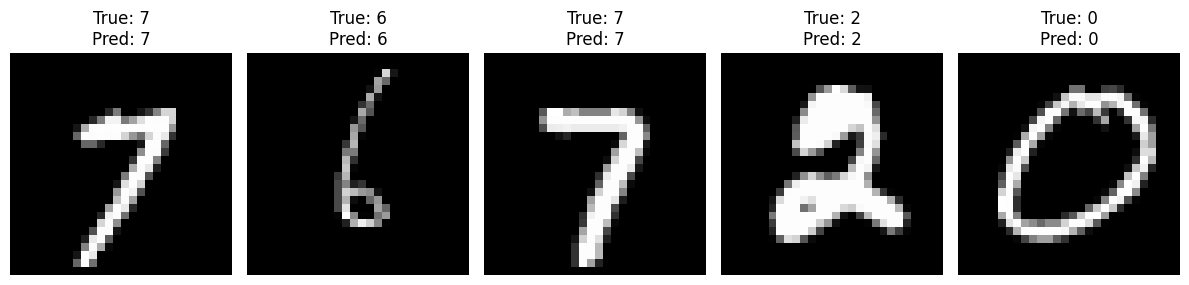

In [13]:
# Predict 5 random test samples
num_samples = 5
indices = np.random.choice(len(X_test), num_samples)
sample_images = X_test[indices]
sample_labels = y_test[indices]
predictions = model.predict(sample_images)

# Plot the images and predictions
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


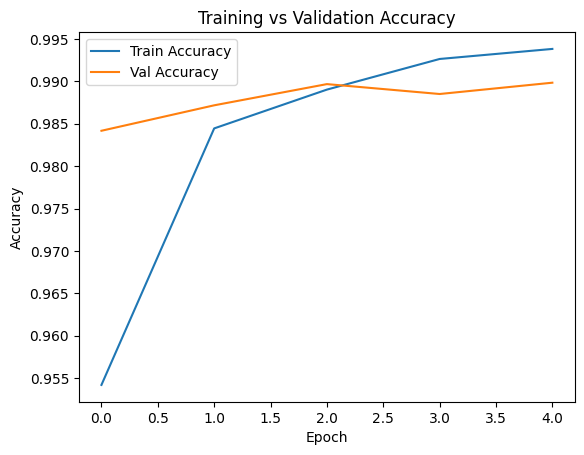

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
